In [ ]:
from google.colab import drive
drive.mount('\\')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
path = 'JEJU_CSV\\'

In [ ]:
file = pd.read_csv(path + '\\final_feature.csv', encoding = 'euc-kr')

In [ ]:
file.head()

,Y_INDEX,X_INDEX,SPO_NO_CD,SPO_NO_250,YACHT,WIFI,TOUR,SAMDASOO,RELIGION,LIFESAVING,FOOD,CAR,CAFE,BUS,ACCOMODATION,ACCIDENT,방문객수
0,1481125,874625,나나7481,나나74A81C,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1,1481125,874875,나나7481,나나74A81D,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2,1480375,874875,나나7480,나나74B80D,0,0,0,0,0,0,0,0,0,0,0,0,NaN
3,1480625,874125,나나7480,나나74C80A,0,0,0,0,0,0,0,0,0,0,0,0,NaN
4,1480625,874375,나나7480,나나74C80B,0,0,0,0,0,0,0,0,0,0,0,0,2.31


In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30465 entries, 0 to 30464
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Y_INDEX       30465 non-null  int64  
 1   X_INDEX       30465 non-null  int64  
 2   SPO_NO_CD     30465 non-null  object 
 3   SPO_NO_250    30465 non-null  object 
 4   YACHT         30465 non-null  int64  
 5   WIFI          30465 non-null  int64  
 6   TOUR          30465 non-null  int64  
 7   SAMDASOO      30465 non-null  int64  
 8   RELIGION      30465 non-null  int64  
 9   LIFESAVING    30465 non-null  int64  
 10  FOOD          30465 non-null  int64  
 11  CAR           30465 non-null  int64  
 12  CAFE          30465 non-null  int64  
 13  BUS           30465 non-null  int64  
 14  ACCOMODATION  30465 non-null  int64  
 15  ACCIDENT      30465 non-null  int64  
 16  방문객수          15211 non-null  float64
dtypes: float64(1), int64(14), object(2)
memory usage: 4.0+ MB


In [ ]:
file['방문객수'] = file['방문객수'].fillna(0)

In [ ]:
file.describe()

,Y_INDEX,X_INDEX,YACHT,WIFI,TOUR,SAMDASOO,RELIGION,LIFESAVING,FOOD,CAR,CAFE,BUS,ACCOMODATION,ACCIDENT,방문객수
count,3.046500e+04,30465.000000,30465.000000,30465.000000,30465.000000,30465.000000,30465.000000,30465.000000,30465.000000,30465.000000,30465.000000,30465.000000,30465.000000,30465.000000,30465.000000
mean,1.489100e+06,911900.414410,0.000263,32.360578,0.015723,0.000197,0.002232,0.001379,0.010504,0.004103,0.002462,0.109831,0.043821,0.058198,17.647148
std,1.100079e+04,18383.647416,0.016203,274.623499,0.162200,0.014033,0.051196,0.145163,0.139947,0.114370,0.056374,0.475175,0.478685,0.561648,102.796395
min,1.458875e+06,874125.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.481125e+06,896625.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.488625e+06,912375.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.496125e+06,927125.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.500000
max,1.558375e+06,950875.000000,1.000000,14235.000000,7.000000,1.000000,2.000000,23.000000,5.000000,9.000000,5.000000,6.000000,21.000000,25.000000,3591.990000


In [ ]:
file.columns

Index(['Y_INDEX', 'X_INDEX', 'SPO_NO_CD', 'SPO_NO_250', 'YACHT', 'WIFI',
       'TOUR', 'SAMDASOO', 'RELIGION', 'LIFESAVING', 'FOOD', 'CAR', 'CAFE',
       'BUS', 'ACCOMODATION', 'ACCIDENT', '방문객수'],
      dtype='object')

In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30465 entries, 0 to 30464
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Y_INDEX       30465 non-null  int64  
 1   X_INDEX       30465 non-null  int64  
 2   SPO_NO_CD     30465 non-null  object 
 3   SPO_NO_250    30465 non-null  object 
 4   YACHT         30465 non-null  int64  
 5   WIFI          30465 non-null  int64  
 6   TOUR          30465 non-null  int64  
 7   SAMDASOO      30465 non-null  int64  
 8   RELIGION      30465 non-null  int64  
 9   LIFESAVING    30465 non-null  int64  
 10  FOOD          30465 non-null  int64  
 11  CAR           30465 non-null  int64  
 12  CAFE          30465 non-null  int64  
 13  BUS           30465 non-null  int64  
 14  ACCOMODATION  30465 non-null  int64  
 15  ACCIDENT      30465 non-null  int64  
 16  방문객수          30465 non-null  float64
dtypes: float64(1), int64(14), object(2)
memory usage: 4.0+ MB


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


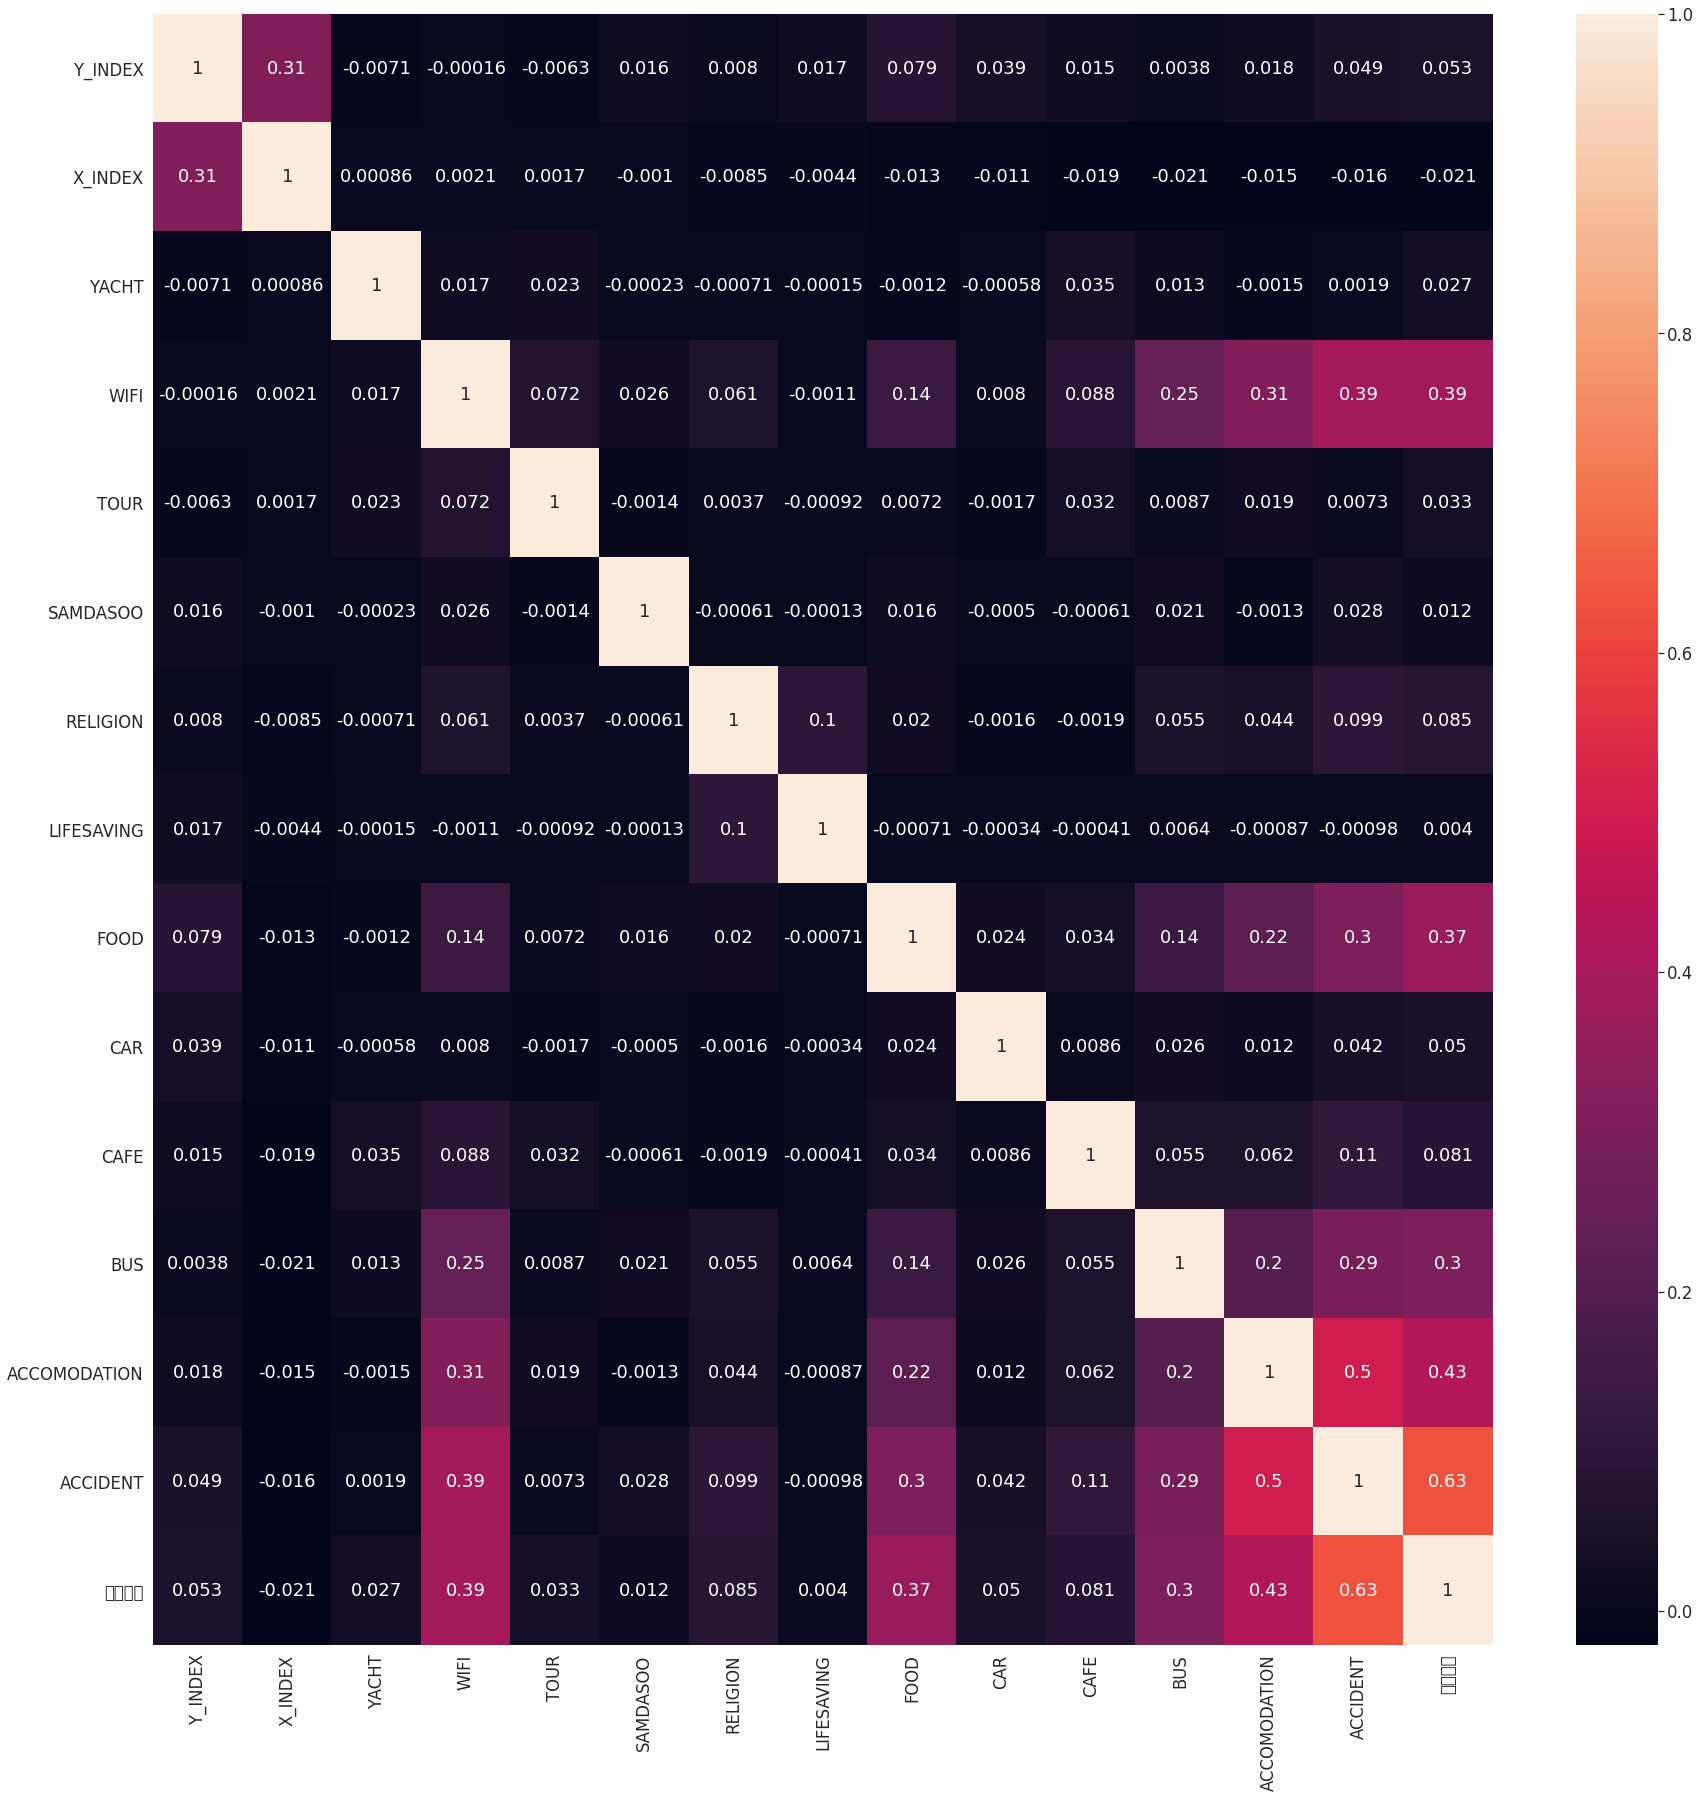

In [ ]:
import warnings 
warnings.filterwarnings(action='ignore')
import seaborn as sns
sns.set(font_scale=1.5) 
plt.figure(figsize=(30,30))
plt.rc('font', family='NanumBarunGothic') 
sns.heatmap(file.corr(), annot= True, fmt ='0.2g')
# plt.show()

In [ ]:
file.drop(['Y_INDEX', 'X_INDEX', 'SPO_NO_CD', 'SPO_NO_250'], axis=1, inplace=True)

#변수선택

In [ ]:
data = file.copy()

In [ ]:
num_temp = data.drop('방문객수', axis=1)

In [ ]:
num_temp = pd.DataFrame(columns = list(num_temp), data = StandardScaler().fit_transform(num_temp))
# sc_list = list(data.columns)[1:]
# X_train_scaled = scaler.fit(data[sc_list])

In [ ]:
num_temp

,YACHT,WIFI,TOUR,SAMDASOO,RELIGION,LIFESAVING,FOOD,CAR,CAFE,BUS,ACCOMODATION,ACCIDENT
0,-0.016207,-0.117838,-0.096937,-0.014035,-0.043599,-0.009497,-0.075057,-0.035876,-0.043671,-0.231142,-0.091546,-0.103622
1,-0.016207,-0.117838,-0.096937,-0.014035,-0.043599,-0.009497,-0.075057,-0.035876,-0.043671,-0.231142,-0.091546,-0.103622
2,-0.016207,-0.117838,-0.096937,-0.014035,-0.043599,-0.009497,-0.075057,-0.035876,-0.043671,-0.231142,-0.091546,-0.103622
3,-0.016207,-0.117838,-0.096937,-0.014035,-0.043599,-0.009497,-0.075057,-0.035876,-0.043671,-0.231142,-0.091546,-0.103622
4,-0.016207,-0.117838,-0.096937,-0.014035,-0.043599,-0.009497,-0.075057,-0.035876,-0.043671,-0.231142,-0.091546,-0.103622
...,...,...,...,...,...,...,...,...,...,...,...,...
30460,-0.016207,-0.117838,-0.096937,-0.014035,-0.043599,-0.009497,-0.075057,-0.035876,-0.043671,-0.231142,-0.091546,-0.103622
30461,-0.016207,-0.117838,-0.096937,-0.014035,-0.043599,-0.009497,-0.075057,-0.035876,-0.043671,-0.231142,-0.091546,-0.103622
30462,-0.016207,-0.117838,-0.096937,-0.014035,-0.043599,-0.009497,-0.075057,-0.035876,-0.043671,-0.231142,-0.091546,-0.103622
30463,-0.016207,-0.117838,-0.096937,-0.014035,-0.043599,-0.009497,-0.075057,-0.035876,-0.043671,-0.231142,-0.091546,-0.103622


In [ ]:
train_y = data.방문객수
scl_train = num_temp

In [ ]:
temp_list = list(scl_train)

In [ ]:
anova_data = pd.DataFrame(columns = list(scl_train), data = scl_train)
anova_data = anova_data[temp_list].copy()
lm = sm.OLS(train_y.values, anova_data[list(anova_data)])
results = lm.fit()
results_summary = results.summary()
results_as_html = results_summary.tables[1].as_html()
result_summary = pd.DataFrame(pd.read_html(results_as_html, header=0, index_col=0)[0])
print(result_summary[result_summary['P>|t|'] < 0.005].index.tolist())
# results_summary

['YACHT', 'WIFI', 'TOUR', 'RELIGION', 'FOOD', 'CAR', 'BUS', 'ACCOMODATION', 'ACCIDENT']


In [ ]:
results_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.461
Model:                            OLS   Adj. R-squared (uncentered):              0.461
Method:                 Least Squares   F-statistic:                              2173.
Date:                Mon, 09 Aug 2021   Prob (F-statistic):                        0.00
Time:                        06:37:12   Log-Likelihood:                     -1.7539e+05
No. Observations:               30465   AIC:                                  3.508e+05
Df Residuals:                   30453   BIC:                                  3.509e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
YACHT            2.3201      0.439      5.283      0.000       1.459       3.181
WIFI            13.7266      0.489     28.049      0.000      12.767      14.686
TOUR             1.5507      0.440      3.522      0.000       0.688       2.414
SAMDASOO        -0.8335      0.439     -1.898      0.058      -1.694       0.027
RELIGION         1.9827      0.444      4.470      0.000       1.113       2.852
LIFESAVING       0.2372      0.441      0.538      0.591      -0.627       1.102
FOOD            18.2860      0.463     39.513      0.000      17.379      19.193
CAR              2.3454      0.439      5.340      0.000       1.485       3.206
CAFE             0.0031      0.443      0.007      0.994      -0.864       0.871
BUS              9.5299      0.465     20.483      0.000       8.618      10.442
ACCOMODATION    11.0555      0.514     21.513      0.000      10.048      12.063
ACCIDENT        45.3988      0.553     82.078      0.000      44.315      46.483
==============================================================================
Omnibus:                    56483.158   Durbin-Watson:                   1.172
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        196479840.333
Skew:                          13.661   Prob(JB):                         0.00
Kurtosis:                     395.477   Cond. No.                         2.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
scaler = StandardScaler()
# X_train = data.loc[:,['YACHT', 'WIFI', 'TOUR', 'RELIGION', 'FOOD', 'CAR', 'BUS', 'ACCIDENT', 'ACCOMODATION']]
X_train = data.loc[:,['YACHT', 'WIFI', 'TOUR', 'FOOD', 'CAR', 'BUS', 'ACCIDENT', 'ACCOMODATION']]
X_train = scaler.fit_transform(X_train)

In [ ]:

y_train = data['방문객수']

In [ ]:
X_train

array([[-0.02368315, -0.16765987, -0.11081425, ..., -0.33511994,
        -0.15081147, -0.1266215 ],
       [-0.02368315, -0.16765987, -0.11081425, ..., -0.33511994,
        -0.15081147, -0.1266215 ],
       [-0.02368315, -0.16765987, -0.11081425, ..., -0.33511994,
        -0.15081147, -0.1266215 ],
       ...,
       [-0.02368315, -0.16765987, -0.11081425, ..., -0.33511994,
        -0.15081147, -0.1266215 ],
       [-0.02368315, -0.16765987, -0.11081425, ..., -0.33511994,
        -0.15081147, -0.1266215 ],
       [-0.02368315, -0.16765987, -0.11081425, ..., -0.33511994,
        -0.15081147, -0.1266215 ]])

In [ ]:
# X_train_corr = X_train.corr()
# X_train_corr

In [ ]:
# plt.rcParams['figure.figsize']=(15,10)

# sns.heatmap(X_train_corr, annot=True, cmap='Reds')

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = model.score(X_test, y_test)

In [ ]:
accuracy

0.4285533229707893

In [ ]:
model.coef_

array([  5.36515971,  28.22148389,   6.46969804,  34.11150524,
         2.88855574,  18.79244267, 107.59602845,  22.09639891])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error


In [ ]:
MAE =  mean_absolute_error(y_test, y_pred)

MSE = mean_squared_error(y_test, y_pred)


RMSE = np.sqrt(MSE)

MSLE = mean_squared_log_error(y_test, y_pred)

RMSLE = np.sqrt(mean_squared_log_error(y_test, y_pred))

R2 = r2_score(y_test, y_pred)


In [ ]:
MAE

51.14216817314064

In [ ]:
MSE

29352.501376144002